In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn
import matplotlib

In [3]:
df = pd.read_csv('Standardized_data.csv')

In [4]:
df = df.drop('Unnamed: 0', axis =1)
len(df)

883

In [5]:
titles = df['Movie']
df = df.drop('Movie', axis = 1)
df['Target'].isna().sum()

0

In [6]:
#df = df.drop(columns=['Twitter', 'Facebook', 'Instagram', 'Director Twitter following.1'], axis=1)
df['Movie'] = titles
df.to_csv(('Standardized_data.csv'))
df = df.drop('Movie', axis =1)

In [7]:
df

,Runtime (Minutes),Years Old,Production Budget,Director Twitter following,Top 3,Cast Twitter Following,Avg English Score,Rare English Score,Common English Score,Action,...,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Target
0,1.055334,-0.997911,0.670921,-0.195845,-0.262658,-0.428973,-1.052721,0.703030,-0.323004,-0.642262,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.220551
1,0.358459,-0.687907,1.605263,0.637419,-0.282565,-0.330597,0.895576,0.703030,-0.118830,1.556998,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023669
2,0.680093,2.102128,1.605263,-0.199591,-0.283744,0.207110,-0.226601,-0.634963,1.107285,1.556998,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123584
3,-0.552839,0.862113,1.605263,-0.071941,-0.241379,-0.392661,-0.296087,0.703030,-0.312315,1.556998,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.138328
4,2.985141,-0.377903,1.838849,2.022852,-0.192331,-0.120464,0.718861,0.565592,0.886007,-0.642262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.122424
5,-0.660051,0.242105,1.838849,-0.186061,1.202089,0.933431,-0.673533,-0.718574,0.562107,-0.642262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.128886
6,0.251247,1.172116,1.994573,-0.203340,-0.066164,0.219594,-0.759558,0.703030,-0.410660,1.556998,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.165102
7,-0.499233,-0.997911,1.215954,-0.203628,-0.230005,-0.389312,0.498326,0.509697,-0.430971,1.556998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.458653
8,-0.338416,1.172116,1.605263,-0.202064,-0.283773,2.341954,0.028143,0.703030,-0.549627,1.556998,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166125
9,0.090430,0.552109,1.605263,-0.194984,0.880235,0.640102,1.423884,0.703030,-0.519696,1.556998,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171411


In [8]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [24]:
for x in list(df.columns):
    print(x)
print(df.columns)

Runtime (Minutes)
Years Old
Production Budget
Director Twitter following
Top 3
Cast Twitter Following
Avg English Score
Rare English Score
Common English Score
Action
Adventure
Animation
Biography
Comedy
Crime
Drama
Fantasy
Horror
Mystery
Romance
Sci-Fi
Thriller
Jan
Feb
Mar
Apr
May
Jun
Jul
Aug
Sep
Oct
Nov
Dec
Target
Index(['Runtime (Minutes)', 'Years Old', 'Production Budget',
       'Director Twitter following', 'Top 3', 'Cast Twitter Following',
       'Avg English Score', 'Rare English Score', 'Common English Score',
       'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Fantasy', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
       'Sep', 'Oct', 'Nov', 'Dec', 'Target'],
      dtype='object')


In [9]:
from sklearn.ensemble import RandomForestRegressor
y_train = train_dataset['Target']
y_test = test_dataset['Target']
x_train = train_dataset.drop('Target', axis =1)
x_test = test_dataset.drop('Target', axis=1)


In [10]:
RFR = RandomForestRegressor(max_depth=None, random_state=0)

RFR.fit(x_train, y_train)
feature_correlation = dict(zip(list(x_train.columns),RFR.feature_importances_*100))
feature_correlation = {k: v for k, v in sorted(feature_correlation.items(), key=lambda item: item[1], reverse=True)}
feature_correlation


/Users/proyardie/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Top 3': 63.48872280260435,
 'Common English Score': 5.519694816482722,
 'Avg English Score': 5.1157617306851675,
 'Director Twitter following': 4.077253138760616,
 'Cast Twitter Following': 3.7436861125140006,
 'Production Budget': 3.241629464167471,
 'Runtime (Minutes)': 3.1470175382975474,
 'Rare English Score': 2.517152976096879,
 'Oct': 1.9966942118304858,
 'Years Old': 1.5848294955021962,
 'Adventure': 1.1161846568988107,
 'Feb': 0.9610263912052166,
 'Comedy': 0.6167711198413186,
 'Drama': 0.4179272683933881,
 'Thriller': 0.37501721494504353,
 'Horror': 0.3706560422047723,
 'Biography': 0.3068865988928796,
 'Jun': 0.26209913483916003,
 'Sep': 0.2535095388066574,
 'Action': 0.21942844816477455,
 'May': 0.14101031077339996,
 'Nov': 0.1261979447088598,
 'Crime': 0.06524050108898753,
 'Mar': 0.06505962709177675,
 'Mystery': 0.0565555321413701,
 'Animation': 0.04951349274463859,
 'Apr': 0.04379668104207903,
 'Sci-Fi': 0.03052195713366148,
 'Jul': 0.028665983113129706,
 'Fantasy': 0.0

In [11]:
preds = RFR.predict(x_test)
r_2 = RFR.score(x_test,y_test)
print(preds/ y_test)
print(r_2)

9       1.916102
11      3.951207
19      1.140481
23      2.233973
28      0.647833
32      0.933663
36      1.342065
41      1.856687
42      1.392457
43      1.537414
47      1.144090
53      0.988685
57      0.831534
58      1.265706
70      0.610653
72      1.195896
80      0.919682
82      1.099473
84      1.187425
86      1.135525
87      1.016609
91      0.946538
94      0.760368
95      1.140604
98      0.926617
99      1.245882
115     1.223227
119     0.946270
123     1.997502
128     1.118393
         ...    
734     0.787319
739     0.690109
754     0.699862
755     0.707180
756     0.696827
763     0.955566
767    10.660763
770     0.697049
774     1.367181
777     0.847825
779     0.643877
790     0.788472
797     0.585834
802     0.519936
804     6.539866
819     0.732191
822     1.543535
823     0.786039
829     1.242581
833     1.848223
835     0.700536
845     1.458971
846     2.399815
847     2.334873
849     9.082396
850     7.359730
859     1.179340
863     1.6056

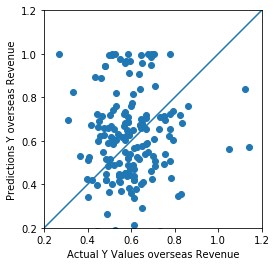

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
import random

test_predictions = RFR.predict(x_test).flatten()
lazy_truth = []

for x in test_predictions:
    y = float(random.randrange(40, 90000))/3
    lazy_truth = x/y +.8
a = plt.axes(aspect='equal')
plt.scatter( test_predictions, y_test)
plt.xlabel('Actual Y Values overseas Revenue')
plt.ylabel('Predictions Y overseas Revenue')
lims = [.2, 1.2]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [13]:
from sklearn.metrics import mean_squared_error as mse
y_train_preds = RFR.predict(x_train)


train_mse = np.sqrt(mse(y_train, y_train_preds))
test_r_2 = RFR.score(x_test, y_test)
test_mse = np.sqrt(mse(y_test, preds))

In [14]:
print(train_mse, 'Train RMSE')
print(test_mse, 'Test RMSE')
print(test_r_2)

0.28738081984780256 Train RMSE
0.26262065166007015 Test RMSE
-0.2565448011604494


In [15]:
#bar chart features
#clustering  based on most important features
#pick most important features and re-run regression model
#GBM ???
#BUCKETIZED Target variable - HIGH, MEDIUM, LOW
#heat mapping of titles, GEnres, talent popularity
#timestampped twitter data for future work

plt.figure(figsize=(30, 10))
sns.set()
sns.barplot(x = fdf[0:13].Feature, y = fdf[0:13].Value )
plt.title('Feature Correlation', fontsize = 20)
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.yticks([x for x in list(range(66)) if x % 2 == 0])
plt.savefig("Feature Importance")
plt.show()

NameError: name 'fdf' is not defined

<Figure size 2160x720 with 0 Axes>

In [16]:
fdf = pd.DataFrame(data=list(feature_correlation.items()))
fdf = fdf.rename({0: 'Feature', 1 : 'Value'}, axis=1)
fdf 

,Feature,Value
0,Top 3,63.488723
1,Common English Score,5.519695
2,Avg English Score,5.115762
3,Director Twitter following,4.077253
4,Cast Twitter Following,3.743686
5,Production Budget,3.241629
6,Runtime (Minutes),3.147018
7,Rare English Score,2.517153
8,Oct,1.996694
9,Years Old,1.584829


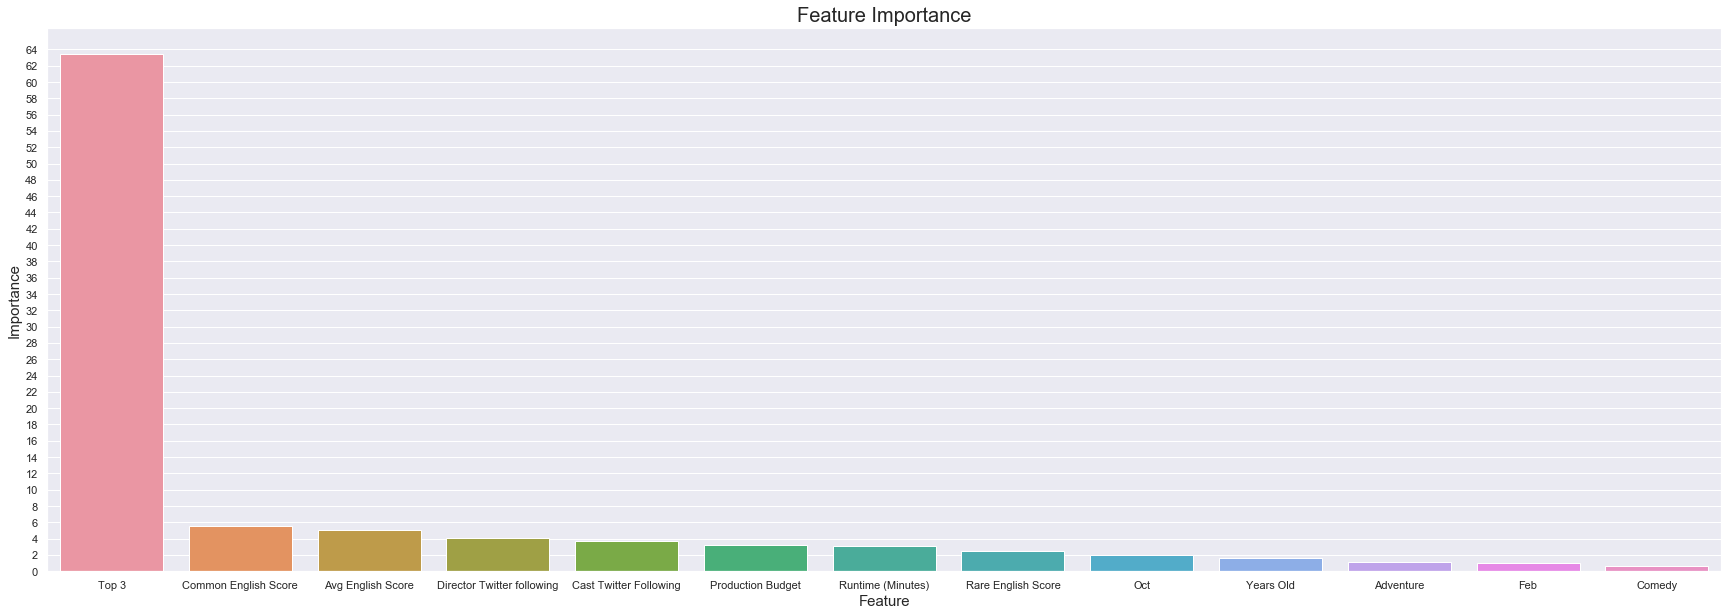

In [17]:
plt.figure(figsize=(30, 10))
sns.set()
sns.barplot(x = fdf[0:13].Feature, y = fdf[0:13].Value )
plt.title('Feature Importance', fontsize = 20)
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("Importance", fontsize = 15)
plt.yticks([x for x in list(range(66)) if x % 2 == 0])
plt.savefig("Feature Importance")
plt.show()

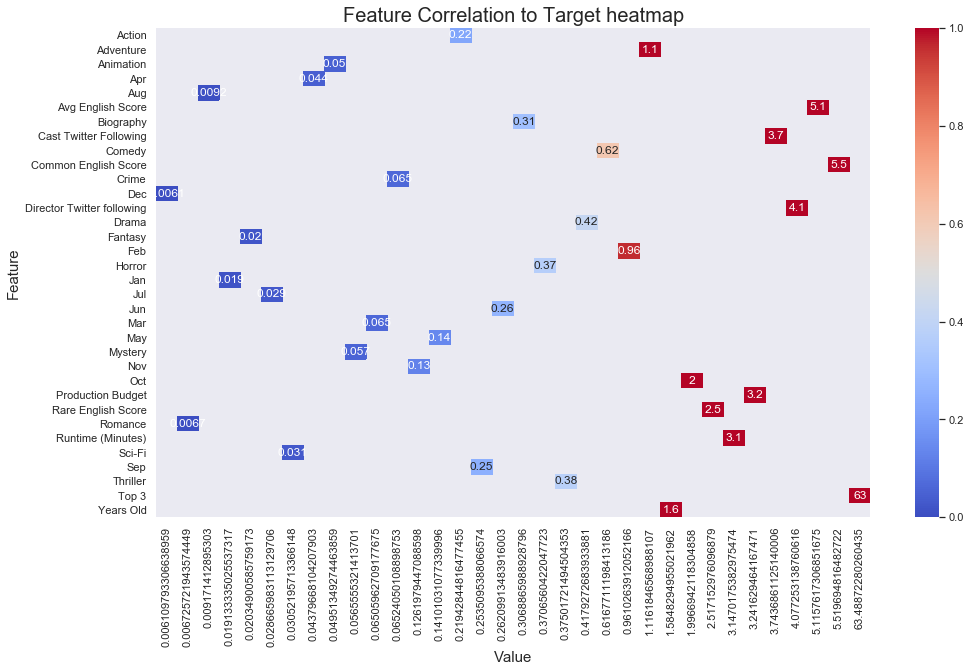

In [18]:
plt.figure(figsize=(16,9))

result = fdf.pivot('Feature', 'Value', 'Value')
sns.heatmap(result, annot=True, cmap = 'coolwarm',vmin=0, vmax=1)
plt.savefig("Feature Correlation To Target Value")
plt.title('Feature Correlation to Target heatmap', fontsize = 20)
plt.xlabel("Value", fontsize = 15)
plt.ylabel("Feature", fontsize = 15)
plt.show()

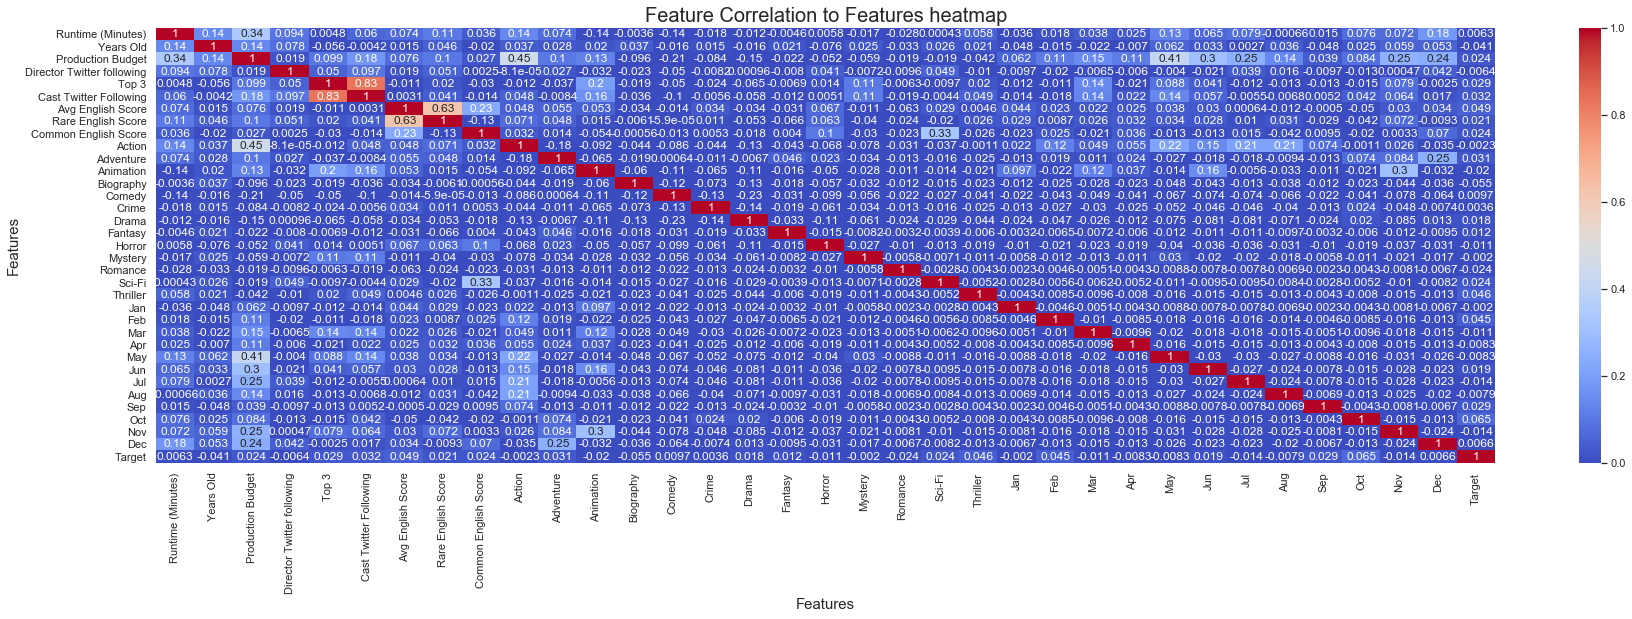

In [19]:
plt.figure(figsize=(30,8))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm',vmin=0, vmax=1)
plt.savefig("Correlation between features heatMap Values")
plt.title('Feature Correlation to Features heatmap', fontsize = 20)
plt.xlabel('Features',fontsize =15)
plt.ylabel('Features', fontsize =15)
plt.show()

In [20]:
'Model Inputs'
'''
-  Top actor twitter following
-  Genre
-  Release Season (Winter, Spring, Summer, Fall)
-  Director (from twitter)
-  RunTime (bucketized)
-  Movie Description (??)
'''

'\n-  Top actor twitter following\n-  Genre\n-  Release Season (Winter, Spring, Summer, Fall)\n-  Director (from twitter)\n-  RunTime (bucketized)\n-  Movie Description (??)\n'

In [27]:
from sklearn.externals import joblib
import pickle
pickle.dump(RFR, open('model.pkl','wb'))

#joblib.dump(RFR, 'RandomForrest_model.joblib')

In [26]:
RFR.predict([120,3,1200000,50000000,])


ValueError: Expected 2D array, got 1D array instead:
array=[1.2e+02 3.0e+00 1.2e+06 5.0e+07].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.